# **Procesamiento de cadenas de texto**

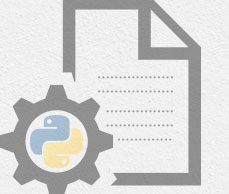

<a id='Indice'></a>
## Índice

1. [Descripción del trabajo](#descripcion-del-trabajo)
1. [Preprocesamiento](#preprocesamiento)
1. [Creación del ranking](#creacion-del-ranking)
1. [Calcular distancia mínima entre palabras](#calcular-distancia-minima-entre-palabras)
1. [Mostrar matriz](#mostrar-matriz)
1. [Ejecutar programa](#ejecutar-programa)

## <a id='descripcion-del-trabajo'>**Descripción del trabajo**</a>

Generación del ranking de las palabras más buscadas en un texto en español enviado a través de un archivo .txt del cual primero se realiza su preprocesamiento (eliminación de stop words en el idioma Español) para luego crear el ranking de las palabras más aparecidas en el texto y por último calcular la distancia mínima entre palabras para mostrar esos valores en una matriz que contiene todas las palabras que no son stop words para ver la distancia mínima entre cada una de ellas.

## <a id='preprocesamiento'>**Preprocesamiento**</a>

In [ ]:
def preprocesamiento(archivo_fragmento, stop_words_ESP):
  '''preprocesamiento es una función cuyo propósito es coger el archivo de entrada \'archivo_fragmento\' con texto en español
     y aplicarle filtrado de caracteres especiales del idioma, limpieza de espaciados, eliminación de stopwords (palabras vacías) y formateo de texto a minúsculas.
     Al final se retornará una cadena con el texto limpio.
     ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     Entradas:
       archivo_fragmento: Es un archivo al cual solo se le aplica operación de lectura para extraer de él su texto que debe estar en español.
       stop_words_ESP: Es un archivo de solo lectura sobre el cual se extraera en una lista todas las stop words del español que contenga para hacer la eliminación de estas palabras en el texto original
     Salidas:
       texto: Es una variable tipo String o cadena que contiene modificado el texto original de \'archivo_fragmento.txt' con la eliminación de caracteres especiales, stop words del español y limpieza de espacios en blanco a los extremos de cada línea del texto.
     ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     Bloques de código:
       Bloque 1: Este bloque se ocupa de leer el archivo \'stopWordsSPA.txt\' y guardar en una lista todas las palabras
       Bloque 2: Aquí se extrae el texto del archivo \'fragmento.txt\', se guarda en una variable tipo String llamada \'texto\' y el contenido se formatea a minúsculas
       Bloque 3: En este bloque se hace la eliminación de los caracteres especiales que pueda haber en cualquier parte del texto
       Bloque 4: Este bloque se encarga de eliminar los espacios en blanco dobles, triples para garantizar que las palabras se encuentran separadas por un solo espacio
       Bloque 5: En este bloque se borran las impurezas (espacios en blanco al inicio y final de cada línea) que pudieron quedar de la ejecución del Bloque 4
       Bloque 6: Dentro de este bloque se buscan las stop words que hayan en el texto, se borran y posteriormente se reconstruye el texto sin las stop words, dando como salida la variable \'texto\'
  '''
  #----------------------------------------
  # Bloque 1                              |
  #----------------------------------------
  stop_words = stop_words_ESP.readlines()
  for i in range(len(stop_words)):
    stop_words[i] = stop_words[i].replace("\n","")
  #----------------------------------------
  # Bloque 2                              |
  #----------------------------------------
  lineas_texto = archivo_fragmento.readlines()
  texto = ""
  for linea in lineas_texto:
    texto+=linea
  texto = texto.lower()
  #----------------------------------------
  # Bloque 3                              |
  #----------------------------------------
  caracteres_especiales = """#$¥£€₩%^&*()¿?¡!/\`'"“”|¬-—_{}+[]=<>«»:;,.°"""
  for caracter in caracteres_especiales:
    texto = texto.replace(caracter,"")
  #----------------------------------------
  # Bloque 4                              |
  #----------------------------------------
  i = 0
  n = len(texto)
  while i < n:
    if texto[i:i+2] == "  ":
      cambio = texto[:i]+texto[i+1:]
      texto = cambio
      n = len(texto)
      i-=1
    i+=1
  #----------------------------------------
  # Bloque 5                              |
  #----------------------------------------
  lineas_texto = texto.split("\n")
  texto = ""
  for i in range(len(lineas_texto)):
    lineas_texto[i] = lineas_texto[i].strip()
  #----------------------------------------
  # Bloque 6                              |
  #----------------------------------------
  for i in range(len(lineas_texto)):
    palabras_linea = lineas_texto[i].split(" ")
    num_palabras = len(palabras_linea)
    j = 0
    while j < num_palabras:
      for stop_word in stop_words:
        if palabras_linea[j]==stop_word:
          palabras_linea.pop(j)
          num_palabras = len(palabras_linea)
          j-=1
          break
      j+=1
    for j in range(num_palabras):
      texto+=palabras_linea[j]+" "
      if j == num_palabras-1:
        texto = texto.strip()
        texto+="\n"
  return texto

## <a id='creacion-del-ranking'>**Creación del ranking**</a>

In [ ]:
def crear_ranking(texto):
  '''La función crear_ranking es una función que cumple el objetivo de crear un ranking de las palabras
     más aparecidas en el texto original en este caso las 15 palabras más aparecidas. Para esto se toma la entrada
     \'texto\' que es una variable manipulada previamente en la función preprocesamiento (ver documentación), que 
     permitirá extraer del texto cuáles son todas las palabras y luego contar las ocurrencias de cada una
     y finalmente identificar las 15 más aparecidas. Al final se devolverá una lista ordenada de manera descendente con el
     número de ocurrencias de las 15 palabras más aparecidas y otra con las palabras en sí. Las posiciones de cada palabra
     y su número de ocurrencias entre ambas listas serán las mismas.
     Entradas:
       texto: Es una variable de tipo String que contiene el texto original limpiado y con la cual se hará la búsqueda de todas las palabras en el texto, el conteo de sus ocurrencias y la creación del ranking.
     Salidas:
       palabras_mas_aparecidas: Es una lista que contiene datos tipo String que son las 15 palabras más aparecidas en el texto
       frecuencias: Es una lista que contiene datos de tipo entero que corresponden a la cantidad de ocurrencias de cada palabra que aparece según su posición en la lista \'palabras_mas_aparecidas\'
     ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     Bloques de código:
       Bloque 1: Este bloque realiza la tarea de declarar las listas a retornar y el diccionario del ranking desordenado asi como almacenar las líneas del texto modificado en una lista llamada \'lineas_texto\' y luego sobre otra lista denominada \'palabras_texto\' se guardarán todas las palabras del texto
       Bloque 2: Este bloque se ocupa de recorrer las palabras guardadas en la lista \'palabras texto\' y durante este recorrido ir almacenando en un diccionario llamado \'ranking_desordenado\' cada palabra y cuántas veces se ha repetido.
       Bloque 3: En este bloque se realiza con el método sorted() el ordenamiento descendente de cada palabra que está como par clave-valor en el diccionario \'ranking_desordenado\'. Este ordenamiento queda guardado en la lista \'llaves_ordenadas\' y en el nuevo diccionario \'ranking_ordenado\' se guardan las palabras como sus frecuencias (número de ocurrencias)
       Bloque 4: Este bloque realiza la tarea de filtrar las 15 palabras más aparecidas extrayéndolas del diccionario \'ranking_ordenando\' y guardando las claves del diccionario (palabras) en la lista \'palabras_mas_aparecidas\'  y los valores (frecuencias) en la lista \'frecuencias\'
  '''
  #----------------------------------------
  # Bloque 1                              |
  #----------------------------------------
  palabras_mas_aparecidas, frecuencias, ranking_desordenado = [], [], {}
  lineas_texto = texto.split("\n")
  palabras_texto = []
  for linea in lineas_texto:
    palabras_linea = linea.split(" ")
    for palabra in palabras_linea:
      palabras_texto.append(palabra)
  #----------------------------------------
  # Bloque 2                              |
  #----------------------------------------
  for palabra in palabras_texto:
    if not(palabra in ranking_desordenado):
      ranking_desordenado[palabra]=1
    else:
      ranking_desordenado[palabra]+=1
  #----------------------------------------
  # Bloque 3                              |
  #----------------------------------------
  ranking_ordenado = {}
  llaves_ordenadas = sorted(ranking_desordenado, key=ranking_desordenado.get, reverse=True)
  for llave in llaves_ordenadas:
    ranking_ordenado[llave] = ranking_desordenado[llave]
  #----------------------------------------
  # Bloque 4                              |
  #----------------------------------------
  tamaño_ranking = 15
  for k,v in ranking_ordenado.items():
    if len(palabras_mas_aparecidas)<tamaño_ranking:
      palabras_mas_aparecidas.append(k)
      frecuencias.append(v)
  print(palabras_mas_aparecidas)
  return palabras_mas_aparecidas, frecuencias

## <a id='calcular-distancia-minima-entre-palabras'>**Calcular distancia mínima entre palabras**</a>

In [ ]:
def distancia_minima_palabras(archivo_fragmento, palabras):
  '''distancia_minima_palabras es una función que tiene el objetivo de crear una matriz que guarde las distancias mínimas entre palabras a lo largo
     de todo el texto. Para lograr esto la función trae el archivo original del texto en español \'archivo_fragmento\' y lo convierte en una lista de
     todas las palabras por cada línea del texto para sobre esta encontrar los indices donde aparece cada palabra. Esto último permitirá que se calcule 
     la distancia mínima entre palabras haciendo la resta entre cada indice de las dos palabras que se estén comparando hasta obtener el valor mínimo entre
     ambas palabras.
     Entradas:
       archivo_fragmento: Es un archivo de texto que guarda el archivo \'fragmento.txt\' el cual se utilizará para solo lectura con el fin de guardar en una lista el texto.
       palabras: Es una lista de las 15 palabras más aparecidas en el texto original. Esta lista servirá para identificar en qué posiciones del texto aparecen las palabras para con eso calcular la distancia mínima entre cada par de palabras.
     Salidas:
       dis_min: Es una matriz de tamaño NxN que contiene las distancias mínimas entre todas las palabras del texto en español que no son stop words.
     --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     Bloques de código:
       Bloque 1: Este bloque tiene la función de resetear el puntero del archivo \'fragmentos.txt\', leer este archivo y guardarlo en una variable tipo String llamada \'texto\'.
       Bloque 2: Este bloque se ocupa de borrar todos los caracteres especiales del texto original
       Bloque 3: En este bloque se separa el texto por las líneas que lo conforman y luego toda las secuencia de palabras para con estas encontrar las posiciones de la lista \'particion_texto\' en donde cada vez se repiten las palabras.
       Bloque 4: En este bloque se inicializa la matriz \'dis_min\' dejando el tamñaño y los valores de inicialización definidos antes de empezar a operar sobre ella.
       Bloque 5: En este bloque que es el principal de la función, se realiza el cálculo de las distancias mínimas recorriendo la matriz \'dis_min\' y en medio del proceso sobre la otra matriz \'posicion_palabras_texto\' se hace la obtención de los índices de las respectivas palabras para calcular la distancia con el valor absoluto de la diferencia entre los dos valores
  '''
  #----------------------------------------
  # Bloque 1                              |
  #----------------------------------------
  archivo_fragmento.seek(0)
  particion_texto = archivo_fragmento.readlines()
  texto = ""
  for linea in particion_texto:
    texto+=linea
  #----------------------------------------
  # Bloque 2                              |
  #----------------------------------------
  caracteres_especiales = """#$¥£€₩%^&*()¿?¡!/\`'"“”|¬-—_{}+[]=<>«»:;,.°"""
  for caracter in caracteres_especiales:
    texto = texto.replace(caracter,"")
  #----------------------------------------
  # Bloque 3                              |
  #----------------------------------------
  particion_texto = texto.split()
  posicion_palabras_texto = []
  for palabra in palabras:
    indices = []
    for i in range(len(particion_texto)):
      if particion_texto[i].lower() == palabra:
        indices.append(i)
    posicion_palabras_texto.append(indices)
  #----------------------------------------
  # Bloque 4                              |
  #----------------------------------------
  n = len(palabras)
  dis_min = []
  for i in range(n):
    fil = []
    for j in range(n):
      fil.append(0)
    dis_min.append(fil)
  #----------------------------------------
  # Bloque 5                              |
  #----------------------------------------
  for i in range(n):
    for j in range(n):
      if i!=j:
        min = 9223372036854775807
        for indice1 in posicion_palabras_texto[i]:
          for indice2 in posicion_palabras_texto[j]:
            dist = abs(indice1-indice2)-1
            if dist < min:
              min = dist
        dis_min[i][j] = min
  return dis_min

## <a id='mostrar-matriz'>**Mostrar matriz**</a>

In [ ]:
def mostrarMatrizDistanciaMinima(palabras, dis_min):
  '''La función mostrarMatriz como su nombre lo indica busca mostrar a la matriz de distancia mínima.
     Entradas:
       dis_min: Esta variable almacena la matriz de distancia mínima. La razón de traer esta variable es porque es la variable de interés a imprir su contenido.
     Salidas:
       N/A
  '''
  n = len(dis_min)
  print('PALABRA  ',end=' '*7+'\t')
  for i in range(n):
    print(palabras[i],end=' '*4+'\t')
  print()
  for i in range(n):
    print(palabras[i],end=' '*12+'\t')
    for j in range(n):
      print(dis_min[i][j],end='\t'*2)
    print()

## <a id='ejecutar-programa'>**Ejecutar programa**</a>

In [ ]:
archivo_fragmento = open("fragmento.txt","r", encoding="utf8")
archivo_stopwords = open("stopWordsSPA.txt","r",encoding="utf8")
texto = preprocesamiento(archivo_fragmento,archivo_stopwords)
palabras, frecuencias = crear_ranking(texto)
dis_min = distancia_minima_palabras(archivo_fragmento, palabras)
mostrarMatrizDistanciaMinima(palabras, dis_min)

['josé', 'arcadio', 'buendía', 'úrsula', 'melquíades', 'casa', 'años', 'mujer', 'aldea', 'niños', 'noche', 'aquella', 'macondo', 'mundo', 'gitanos']
PALABRA         	josé    	arcadio    	buendía    	úrsula    	melquíades    	casa    	años    	mujer    	aldea    	niños    	noche    	aquella    	macondo    	mundo    	gitanos    	
josé            	0		0		1		4		2		7		8		0		0		4		4		7		6		4		12		
arcadio            	0		0		0		3		3		8		7		1		1		4		3		6		7		5		11		
buendía            	1		0		0		2		4		15		4		2		2		6		2		3		8		6		10		
úrsula            	4		3		2		0		18		3		8		2		12		2		0		7		8		7		0		
melquíades            	2		3		4		18		0		20		11		44		7		15		36		9		10		11		5		
casa            	7		8		15		3		20		0		12		1		5		9		1		13		13		2		42		
años            	8		7		4		8		11		12		0		30		3		2		37		12		0		20		8		
mujer            	0		1		2		2		44		1		30		0		37		2		13		0		75		14		4		
aldea            	0		1		2		12		7		5		3		37		0		31		67		0		0		8		2		
niños            	4		4		6		2		15		9		2		2		31		0		6